<a href="https://colab.research.google.com/github/Rneron/Python/blob/main/ModeloRBS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.8 MB/s eta 0:00:00


In [4]:
#importar pacotes e setar configurações de plots
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set_style()

%matplotlib inline

from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

In [5]:
dados = pd.read_csv('/content/drive/MyDrive/Python/tabelas/Dados.xlsx - Planilha1 (2).csv',encoding='iso-8859-1',header=None,names=["Data","PageViews"])

In [6]:
dados

,Data,PageViews
0,1\01\2023,824605
1,2\01\2023,1064369
2,3\01\2023,1173812
3,4\01\2023,1243996
4,5\01\2023,1039252
...,...,...
244,2\09\2023,5692654
245,3\09\2023,5788904
246,4\09\2023,6065338
247,5\09\2023,6805500


In [7]:

data_inicial = '01-01-2023'
data_final = '06-09-2023'

# Crie uma lista para armazenar as datas
datas = []

# Use um loop para gerar as datas de dia em dia
data_atual = pd.to_datetime(data_inicial, format='%d-%m-%Y')
data_fim = pd.to_datetime(data_final, format='%d-%m-%Y')

while data_atual <= data_fim:
    datas.append(data_atual)
    data_atual += pd.DateOffset(days=1)

# Crie um DataFrame com as datas
df1 = pd.DataFrame({'data': datas})

# Exiba o DataFrame resultante
print(df1)


          data
0   2023-01-01
1   2023-01-02
2   2023-01-03
3   2023-01-04
4   2023-01-05
..         ...
244 2023-09-02
245 2023-09-03
246 2023-09-04
247 2023-09-05
248 2023-09-06

[249 rows x 1 columns]


In [8]:
del dados["Data"]

In [9]:
dados

,PageViews
0,824605
1,1064369
2,1173812
3,1243996
4,1039252
...,...
244,5692654
245,5788904
246,6065338
247,6805500


In [10]:
df = pd.concat([df1,dados], axis=1)


In [11]:
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')


In [50]:
ga4 = df[196:len(df)]

<Axes: >

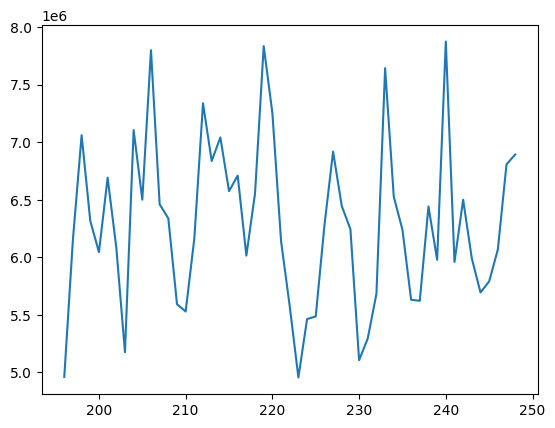

In [45]:
ga4.PageViews.plot()

In [46]:
ga4.shape

(53, 2)

In [51]:
ga4.index = pd.to_datetime(ga4['data'], format='%d/%m/%Y')

Modelo de Suavização Simples


In [163]:
modelo = SimpleExpSmoothing(ga4.PageViews).fit()
previsao = modelo.predict(start='2023-9-7',end='2023-9-15')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Modelo de Suavização de Holt-Winters aditivo

In [152]:

modelo_2=ExponentialSmoothing(ga4.PageViews,seasonal='add',trend='add').fit()
#Gerandio as previsões
previsao_2 = modelo_2.predict(start='2023-9-7',end='2023-9-15')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Modelo de Suavização de Holt-Winters multiplicativo

In [164]:

modelo_3 = ExponentialSmoothing(ga4.PageViews,seasonal='mul',trend='add').fit()
previsao_3 = modelo_3.predict(start='2023-9-7',end='2023-9-15')



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Modelo de Suavização Pegels aditivo

In [165]:
modelo_4 = ExponentialSmoothing(ga4.PageViews,seasonal='add',trend='mul').fit()
previsao_4 = modelo_4.predict(start='2023-9-7',end='2023-9-15')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Modelo de Suavização Pegels multiplicativo

In [166]:
modelo_5 = ExponentialSmoothing(ga4.PageViews,seasonal='mul',trend='mul').fit()
previsao_5 = modelo_5.predict(start='2023-9-7',end='2023-9-15')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [167]:
print('*************Métricas do Algoritmo de Suavização Simples*************')
print(' '*254)
print('-Erro médio absoluto do Algoritmo de Suavização Simples :',
      round(mean_absolute_error(ga4.PageViews,modelo.fittedvalues),3))
print('-Raiz do erro médio quadrado do Algoritmo de Suavização Simples :',
      round(mean_squared_error(ga4.PageViews,modelo.fittedvalues)**0.5,3))


print(' '*504)
print('*************Métricas do Algoritmo de Suavização de Holt-Winters aditivo*************')
print(' '*254)
print('-Erro médio absoluto do Algoritmo de Suavização Holt-Winters aditivo :',
      round(mean_absolute_error(ga4.PageViews,modelo_2.fittedvalues),3))
print('-Raiz do erro médio quadrado do Algoritmo de Suavização Holt-Winters aditivo :',
      round(mean_squared_error(ga4.PageViews,modelo_2.fittedvalues)**0.5,3))

print(' '*504)
print('*************Métricas do Algoritmo de Suavização de Holt-Winters multiplicativo*************')
print(' '*254)
print('-Erro médio absoluto do Algoritmo de Suavização Holt-Winters multiplicativo :',
      round(mean_absolute_error(ga4.PageViews,modelo_3.fittedvalues),3))
print('-Raiz do erro médio quadrado do Algoritmo de Suavização Holt-Winters multiplicativo :',
      round(mean_squared_error(ga4.PageViews,modelo_3.fittedvalues)**0.5,3))

print(' '*504)
print('*************Métricas do Algoritmo de Suavização de Pegels aditivo *************')
print(' '*254)
print('-Erro médio absoluto do Algoritmo de Suavização Pegels aditivo :',
      round(mean_absolute_error(ga4.PageViews,modelo_4.fittedvalues),3))
print('-Raiz do erro médio quadrado do Algoritmo de Suavização Pegels aditivo :',
      round(mean_squared_error(ga4.PageViews,modelo_4.fittedvalues)**0.5,3))

print(' '*504)
print('*************Métricas do Algoritmo de Suavização de Pegels multiplicativo*************')
print(' '*254)
print('-Erro médio absoluto do Algoritmo de Suavização Pegels multiplicativo:',
      round(mean_absolute_error(ga4.PageViews,modelo_5.fittedvalues),3))
print('-Raiz do erro médio quadrado do Algoritmo de Suavização Pegels multiplicativo:',
      round(mean_squared_error(ga4.PageViews,modelo_5.fittedvalues)**0.5,3))

*************Métricas do Algoritmo de Suavização Simples*************
                                                                                                                                                                                                                                                              
-Erro médio absoluto do Algoritmo de Suavização Simples : 619706.974
-Raiz do erro médio quadrado do Algoritmo de Suavização Simples : 799041.127
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
*************Métricas do

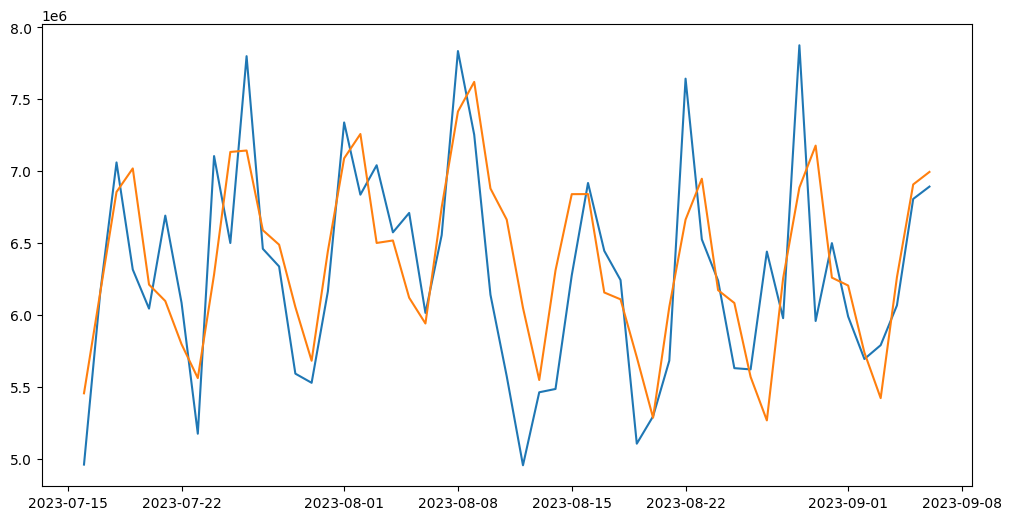

In [168]:
plt.figure(figsize=(12,6))
plt.plot(ga4.PageViews)
plt.plot(modelo_2.fittedvalues)

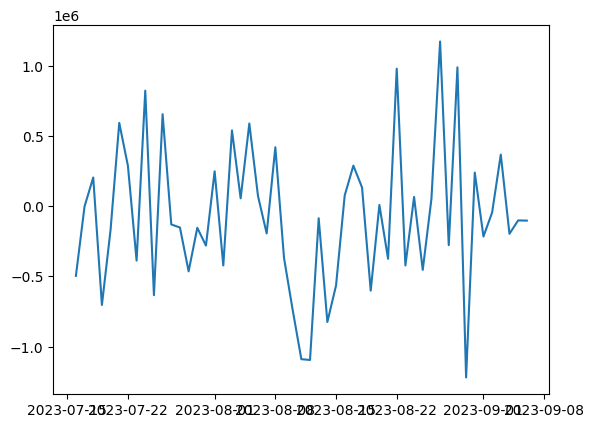

In [170]:
residuo = modelo_2.resid
plt.plot(residuo)

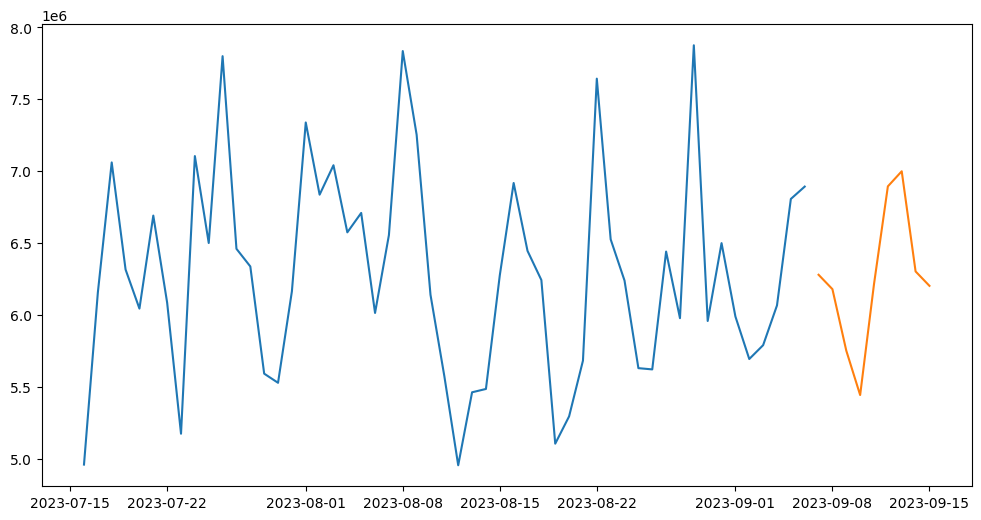

In [171]:
plt.figure(figsize=(12,6))
plt.plot(ga4.PageViews)
plt.plot(previsao_2)

In [173]:
from scipy.stats import jarque_bera
print(' '*254)
test1 = jarque_bera(residuo)
print('Estatística Jarque-Bera :', test1[0])
print('P-valor :', test1[1]) # São Normais

                                                                                                                                                                                                                                                              
Estatística Jarque-Bera : 0.3098498467234309
P-valor : 0.8564794766697681


MODELO ARIMA


In [ ]:
# check_adfuller
def check_adfuller(tq):
    # Dickey-Fuller test
    result = adfuller(tq, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])

In [ ]:
 #check_mean_std
def check_mean_std(ga4):
    #Rolling statistics
    rolmean = ga4.rolling(12).mean()
    rolstd = ga4.rolling(12).std()
    plt.figure(figsize=(22,10))
    orig = plt.plot(ga4, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()


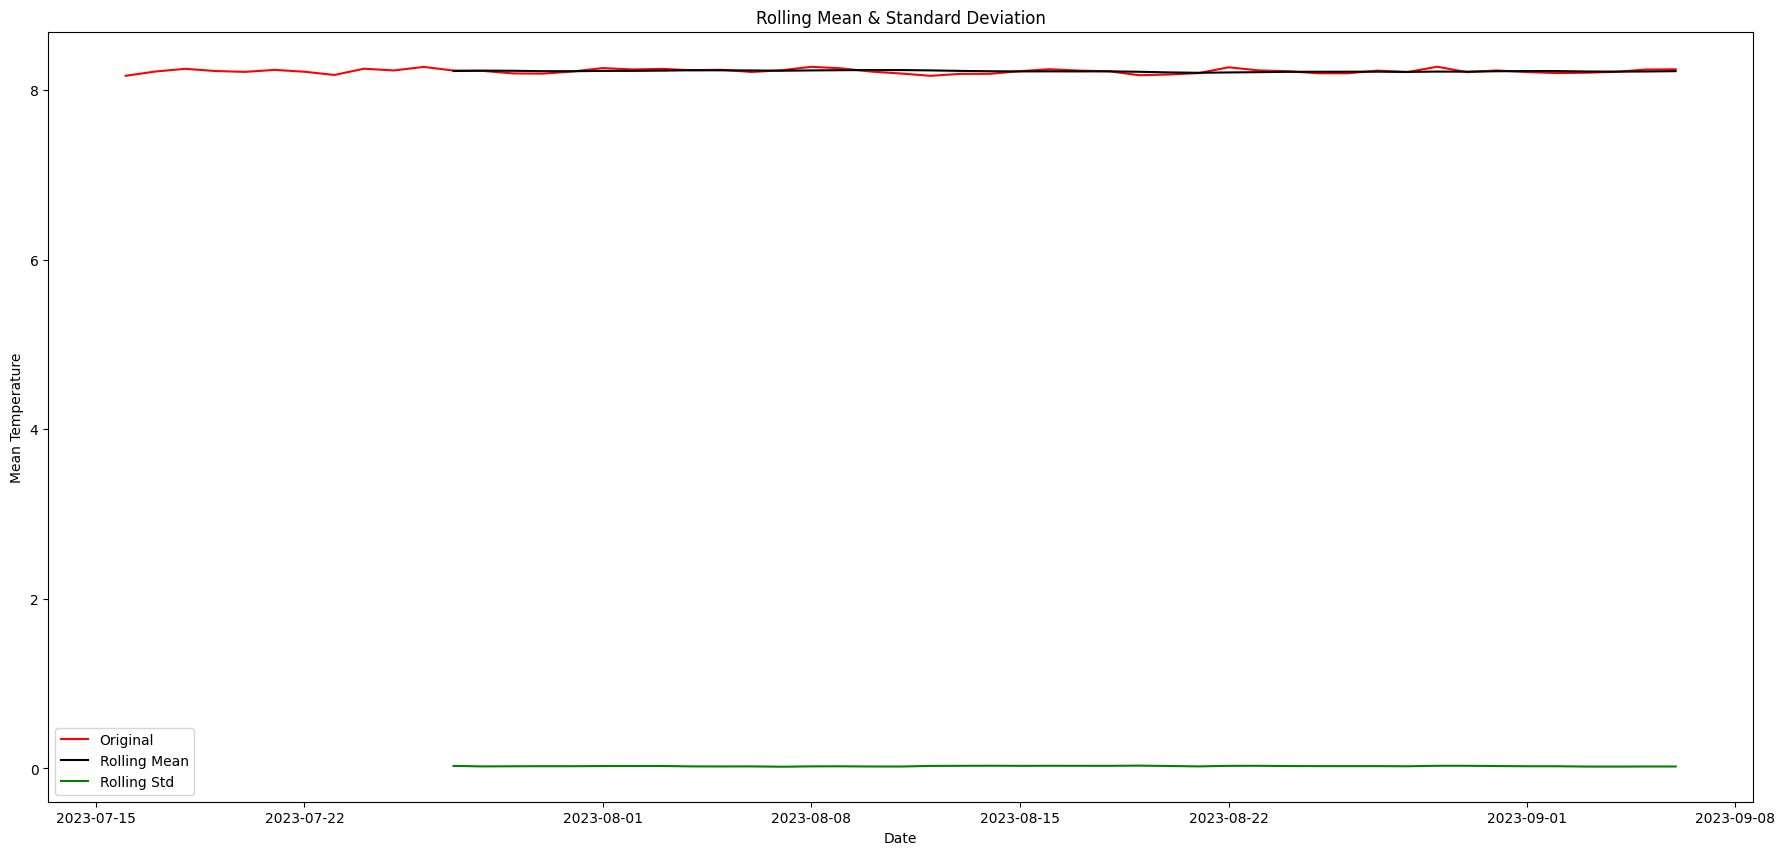

Test statistic:  -5.659042938011617
p-value:  9.472846838242482e-07
Critical Values: {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}


In [ ]:
# verificação do  estacionário: média, variância (std) e teste mais adequado
check_mean_std(ga4)
check_adfuller(ga4.PageViews)

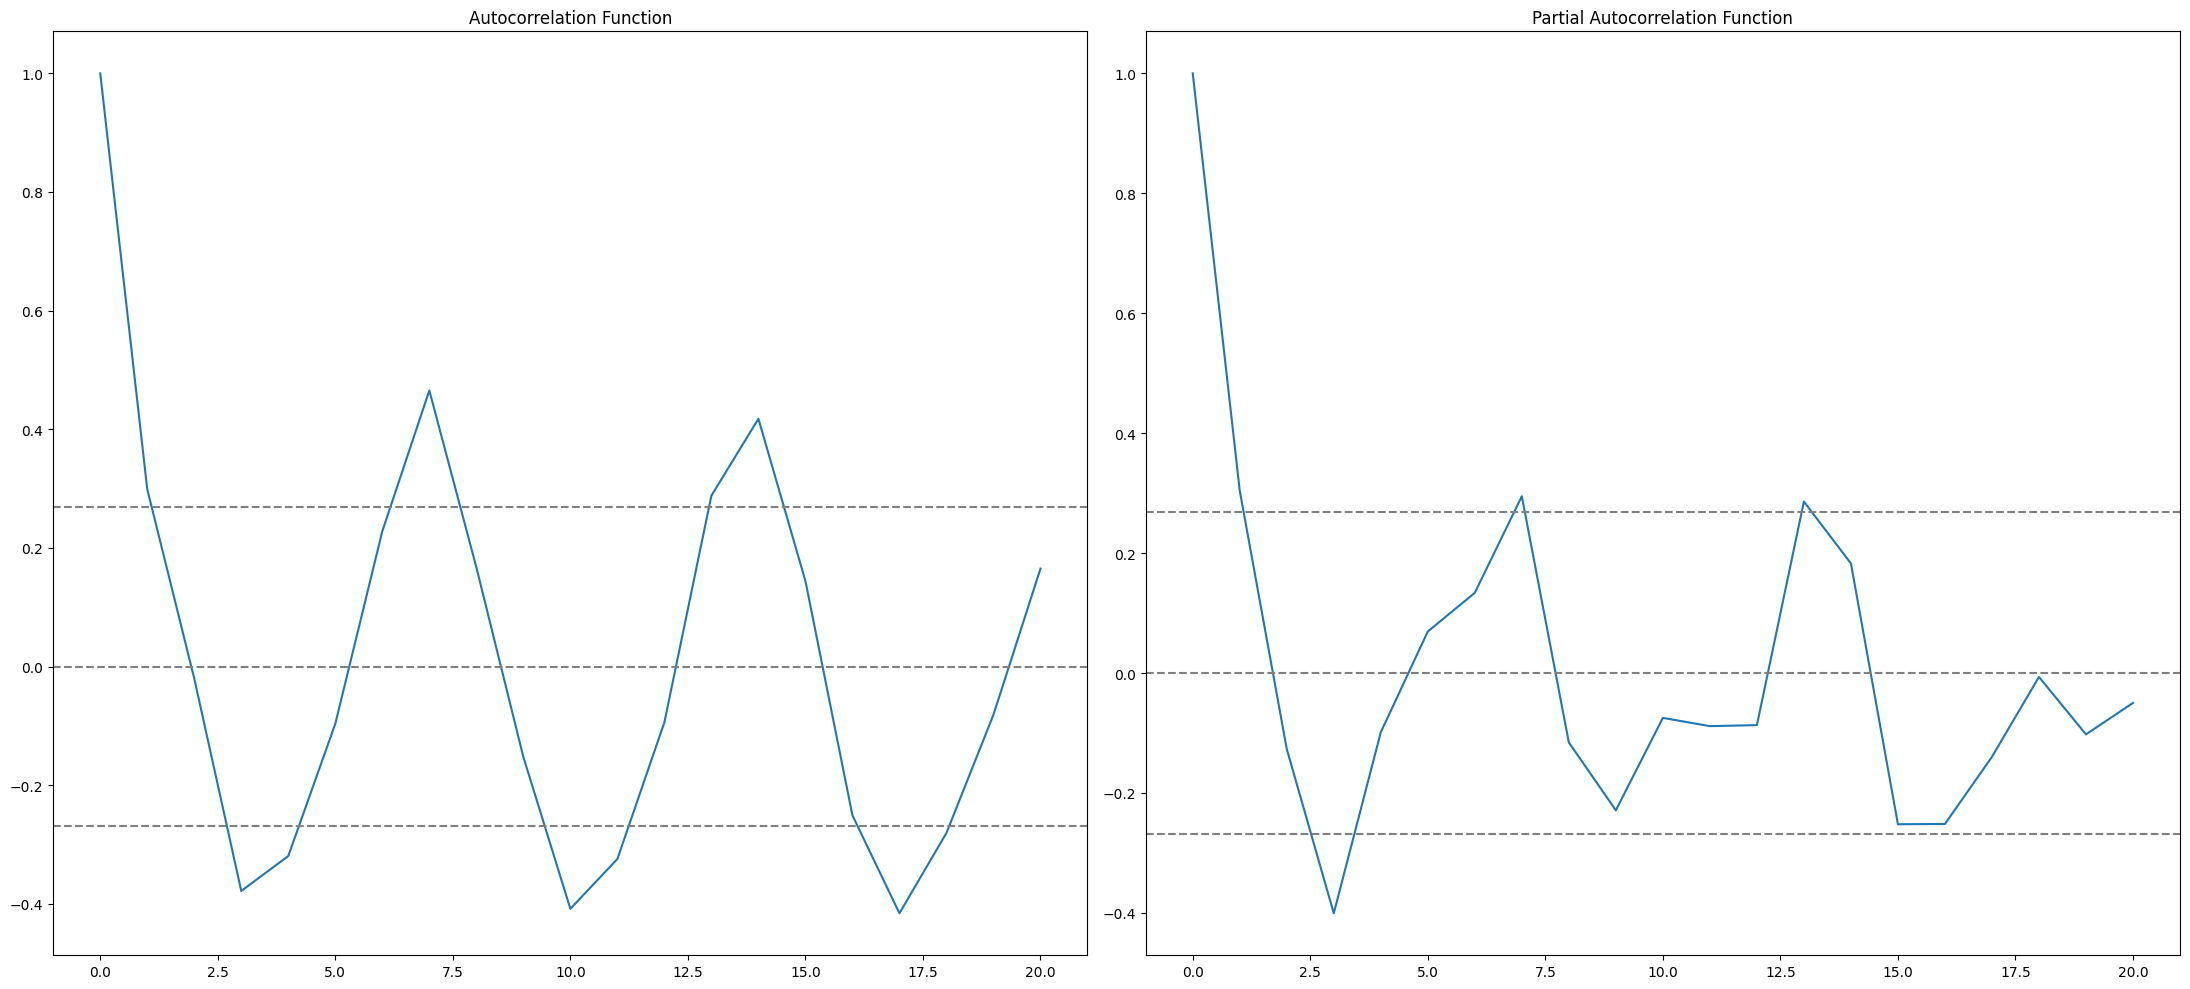

In [ ]:
import numpy as np
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ga4)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ga4)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ga4)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ga4)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

<ipython-input-476-dadcf72b71b4>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maxim

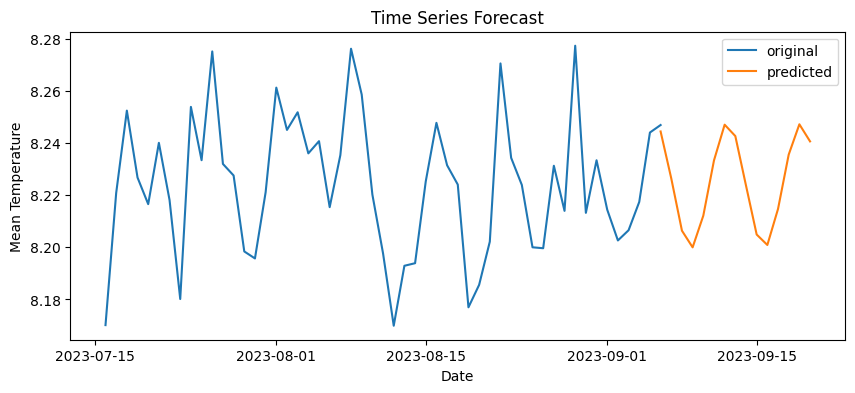

In [ ]:
# Biblioteca ARIMA
from statsmodels.tsa.arima.model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(ga4.PageViews, order=(2,0,2))
model_fit = model.fit()

# Preditivo (previsão)
start_index = datetime(2023, 9, 6)
end_index = datetime(2023, 9, 20)
forecast = model_fit.predict(start=start_index, end=end_index)

# visualização
plt.figure(figsize=(10,4))
plt.plot(ga4.index,ga4.PageViews,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


error:  0.00042026798251196615


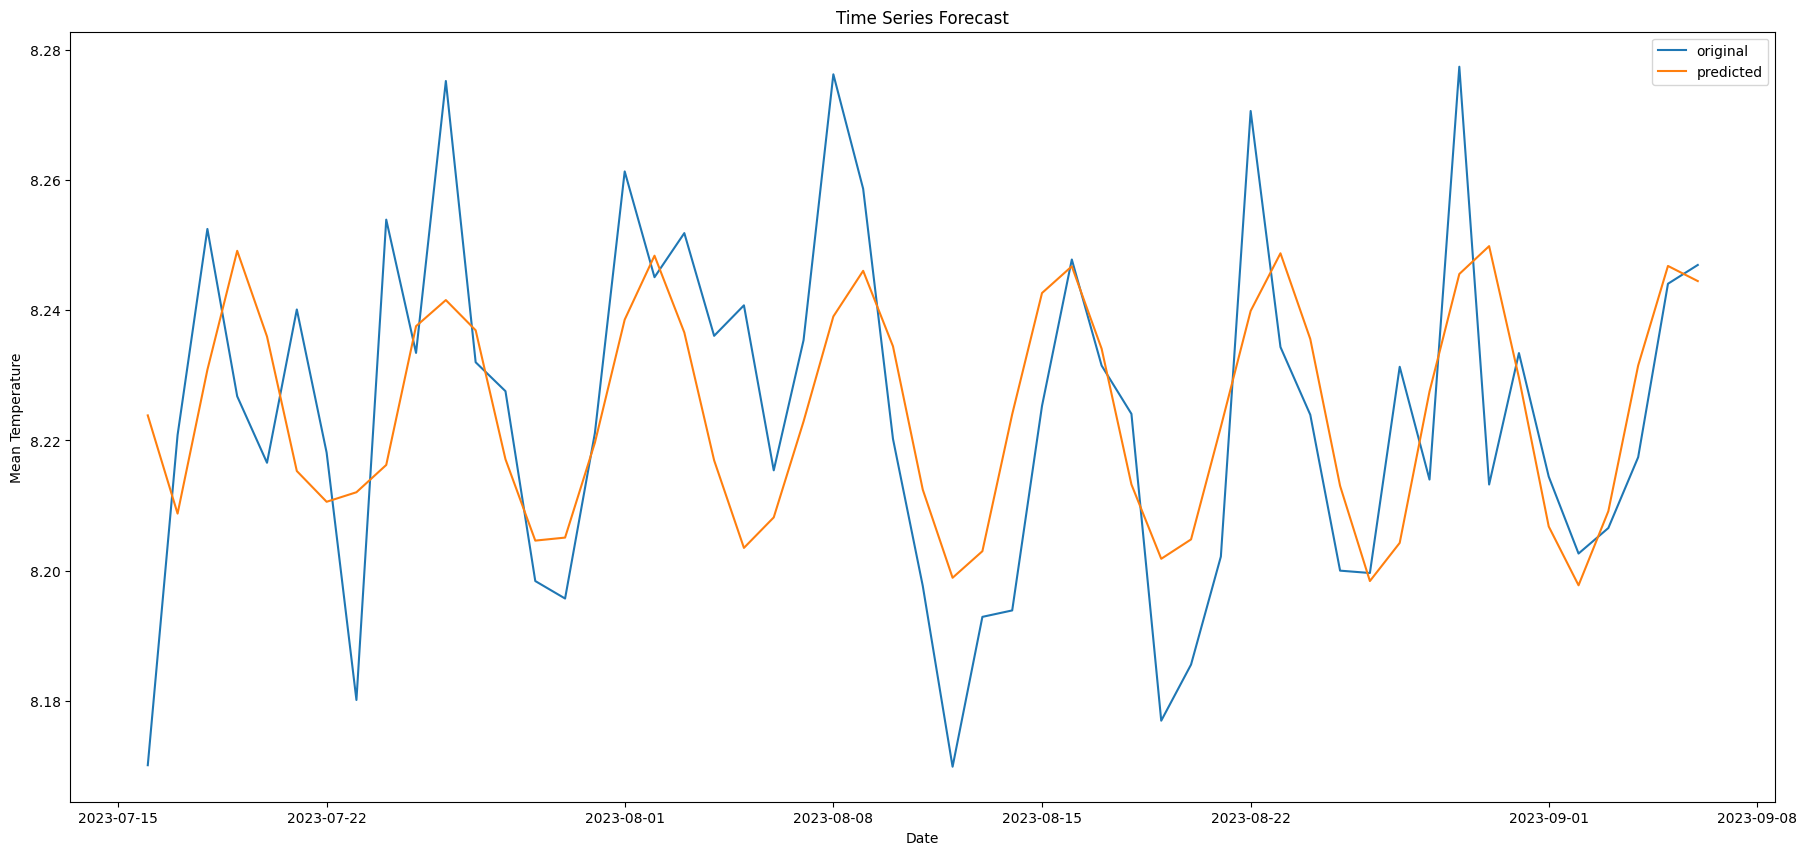

In [ ]:
# prever todo o caminho
from sklearn.metrics import mean_squared_error
# fit model
model2 = ARIMA(ga4, order=(2,0,2))
model_fit2 = model2.fit()
forecast2 = model_fit2.predict()
error = mean_squared_error(ga4, forecast2)
print("error: " ,error)
# visualização
plt.figure(figsize=(22,10))
plt.plot(ga4.index,ga4.PageViews,label = "original")
plt.plot(forecast2,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.savefig('graph.png')

plt.show()

In [ ]:
forecast

2023-09-06    15.739208
2023-09-07    15.660145
2023-09-08    15.569997
2023-09-09    15.538718
2023-09-10    15.590411
2023-09-11    15.684987
2023-09-12    15.749252
2023-09-13    15.733556
2023-09-14    15.650148
2023-09-15    15.563622
2023-09-16    15.540890
2023-09-17    15.599438
2023-09-18    15.693879
2023-09-19    15.751133
2023-09-20    15.726981
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
from scipy.stats import jarque_bera
from matplotlib import pyplot
residuo = model_fit.resid
print(' '*254)
test1 = jarque_bera(residuo)
print('Estatística Jarque-Bera :', test1[0])
print('P-valor :', test1[1]) # São Normais

                                                                                                                                                                                                                                                              
Estatística Jarque-Bera : 0.71906373606981
P-valor : 0.6980030071195096


In [137]:
modelo_2.fittedvalues

data
2023-07-16    5.454323e+06
2023-07-17    6.155472e+06
2023-07-18    6.854253e+06
2023-07-19    7.017680e+06
2023-07-20    6.210141e+06
2023-07-21    6.095791e+06
2023-07-22    5.795533e+06
2023-07-23    5.560076e+06
2023-07-24    6.280112e+06
2023-07-25    7.132293e+06
2023-07-26    7.142241e+06
2023-07-27    6.588261e+06
2023-07-28    6.487506e+06
2023-07-29    6.054306e+06
2023-07-30    5.680577e+06
2023-07-31    6.442902e+06
2023-08-01    7.087989e+06
2023-08-02    7.256959e+06
2023-08-03    6.499557e+06
2023-08-04    6.516785e+06
2023-08-05    6.118743e+06
2023-08-06    5.939639e+06
2023-08-07    6.747600e+06
2023-08-08    7.413414e+06
2023-08-09    7.619286e+06
2023-08-10    6.878030e+06
2023-08-11    6.661847e+06
2023-08-12    6.048435e+06
2023-08-13    5.546676e+06
2023-08-14    6.308436e+06
2023-08-15    6.838847e+06
2023-08-16    6.839404e+06
2023-08-17    6.155125e+06
2023-08-18    6.107678e+06
2023-08-19    5.705182e+06
2023-08-20    5.284554e+06
2023-08-21    6.055287e

In [142]:
from sklearn.metrics import r2_score
print("O R² do modelo ARIMA(2,0,2) é:",r2_score(ga4.PageViews,modelo_2.fittedvalues))

O R² do modelo ARIMA(2,0,2) é: 0.46739367457640146


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              PageViews   No. Observations:                   53
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -776.762
Date:                Tue, 17 Oct 2023   AIC                           1565.524
Time:                        20:27:49   BIC                           1577.346
Sample:                    07-16-2023   HQIC                          1570.070
                         - 09-06-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.289e+06   2.05e-07   3.07e+13      0.000    6.29e+06    6.29e+06
ar.L1          1.2249      0.062     19.874      0.000       1.104       1.346
ar.L2         -0.9977      0.023    -43.483      0.000      -1.043      -0.953
ma.L1         -1.1709      0.313     -3.738      0.000      -1.785      -0.557
ma.L2          0.9644      0.343      2.810      0.005       0.292       1.637
sigma2      3.644e+11   1.27e-12   2.87e+23      0.000    3.64e+11    3.64e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 1.49
Prob(Q):                              0.69   Prob(JB):                         0.47
Heteroskedasticity (H):               0.87   Skew:                             0.31
Prob(H) (two-sided):                  0.78   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.96e+38. Standard errors may be unstable.
"""

2023-09-06    6.857642e+06
2023-09-07    6.371563e+06
2023-09-08    5.821070e+06
2023-09-09    5.633251e+06
2023-09-10    5.952435e+06
2023-09-11    6.530790e+06
2023-09-12    6.920745e+06
2023-09-13    6.821355e+06
Freq: D, Name: predicted_mean, dtype: float64

MODELO USANDO Suavização Exponencial

In [1]:
import pandas as pd
import datetime
from pandas import Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
ga4

NameError: ignored